In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data_mb_21 = pd.read_csv('./data_mb_all_years/2021.csv')

In [7]:
data_mb_21

,S_Seker,MisparMb,Hodesh_Hakira,Shnat_Hakira,Quarter,Weight,Nefashot,NefeshStandartit,Mefarnesim,Nefashot0_4,...,c34,c35,c36,c37,c38,c39,RamatDatiyut,Sex_RMB,MaamadRMB,Religion
0,2021,28106,1,2021,1,383.712,2,2.00,0,NaN,...,0,305,1416,1981,596,6796,1,2,3,1
1,2021,28107,1,2021,1,114.092,1,1.25,0,NaN,...,52,305,520,1525,2831,900,1,2,3,1
2,2021,28108,2,2021,1,195.015,9,5.60,1,4.0,...,2421,0,510,447,2393,562,4,2,1,1
3,2021,28109,1,2021,1,755.693,2,2.00,0,NaN,...,186,0,563,1,176,0,3,2,3,1
4,2021,28110,1,2021,1,527.768,2,2.00,1,NaN,...,463,0,1403,112,46,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,2021,53760,2,2022,4,182.102,6,4.25,2,1.0,...,0,612,2103,2364,3088,21399,3,2,1,1
6053,2021,53762,1,2022,4,278.277,7,4.75,1,2.0,...,0,613,833,1487,89,644,4,2,2,1
6054,2021,58002,8,2021,3,604.582,3,2.65,0,NaN,...,0,0,141,0,617,0,2,1,3,3
6055,2021,58031,1,2022,4,429.712,3,2.65,1,NaN,...,681,0,863,248,340,52,2,2,1,1


In [8]:
incomes = pd.DataFrame()

In [9]:
# Organize religions and religioness in lists
religions = ['Yehudi', 'Notzri', 'Muslemi', 'Druzi', 'Aher']
religion_mapping = {i: r for i, r in enumerate(religions, 1)}
religiosity_levels = ['Hiloni', 'Masorti', 'Dati', 'Haredi', 'Meorav', 'Aher']
religiosity_levels_mapping = {i: rl for i, rl in enumerate(religiosity_levels, 1)}
religion_mapping

{1: 'Yehudi', 2: 'Notzri', 3: 'Muslemi', 4: 'Druzi', 5: 'Aher'}

In [10]:
# fill incomes Data frame
incomes['mispar_mb'] = data_mb_21['MisparMb']
incomes['religion'] = data_mb_21['Religion']
incomes['religion_name'] = data_mb_21['Religion'].replace(religion_mapping)
incomes['religiosity_level'] = data_mb_21['RamatDatiyut']
incomes['nefashot'] = data_mb_21['Nefashot']
incomes['asiron'] = data_mb_21['Decile']
incomes['bruto_income'] = data_mb_21['i1Kaspit']
incomes['total_allowances'] = data_mb_21['i14']
incomes['allowances_as_percentage'] = (incomes['total_allowances'] / incomes['bruto_income']) * 100

In [11]:
incomes

,mispar_mb,religion,religion_name,religiosity_level,nefashot,asiron,bruto_income,total_allowances,allowances_as_percentage
0,28106,1,Yehudi,1,2,10,34922,4467,12.791364
1,28107,1,Yehudi,1,1,10,12182,12182,100.000000
2,28108,1,Yehudi,4,9,2,13216,6046,45.747579
3,28109,1,Yehudi,3,2,1,3249,3086,94.983072
4,28110,1,Yehudi,2,2,4,3921,2051,52.308085
...,...,...,...,...,...,...,...,...,...
6052,53760,1,Yehudi,3,6,10,75968,5373,7.072715
6053,53762,1,Yehudi,4,7,1,10941,4833,44.173293
6054,58002,3,Muslemi,2,3,1,4398,4398,100.000000
6055,58031,1,Yehudi,2,3,3,7712,0,0.000000


In [16]:
# Calculate means of every religion
religions_means = incomes.groupby('religion_name').agg(
    {
        'nefashot': 'mean',
        'asiron': 'mean',
        'bruto_income': 'mean',
        'total_allowances': 'mean',
        'allowances_as_percentage': 'mean',
        'mispar_mb': 'count'
    }
).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
religions_means.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

religions_means.sort_values('religion_name', ascending=False, inplace=True)

# Group by 'religion' and 'religiosity_level' and calculate the average and count for each group
grouped = incomes[incomes['religiosity_level'] < 5].groupby(['religion_name', 'religiosity_level']).agg(
    {
        'nefashot': 'mean',
        'asiron': 'mean',
        'bruto_income': 'mean',
        'total_allowances': 'mean',
        'allowances_as_percentage': 'mean',
        'mispar_mb': 'count'
    }
).reset_index()

# Rename the 'mispar_mb' column to 'count' for clarity
grouped.rename(columns={'mispar_mb': 'mb_count'}, inplace=True)

# too little data
f_grouped = grouped[grouped['mb_count'] >= 5]

religions_means

,religion_name,nefashot,asiron,bruto_income,total_allowances,allowances_as_percentage,mb_count
4,Yehudi,3.289350,6.345958,23790.220933,3194.485644,25.717550,4911
3,Notzri,2.848780,4.560976,15309.068293,3092.560976,39.107358,205
2,Muslemi,4.094366,3.245070,13458.626761,2852.870423,38.904452,710
1,Druzi,3.789916,4.210084,15879.226891,2192.756303,27.198984,119
0,Aher,2.785714,5.392857,19643.169643,2549.214286,27.613418,112


Text(0.75, 0.97, 'p: people in Meshek Bait\na: Averege Asiron')

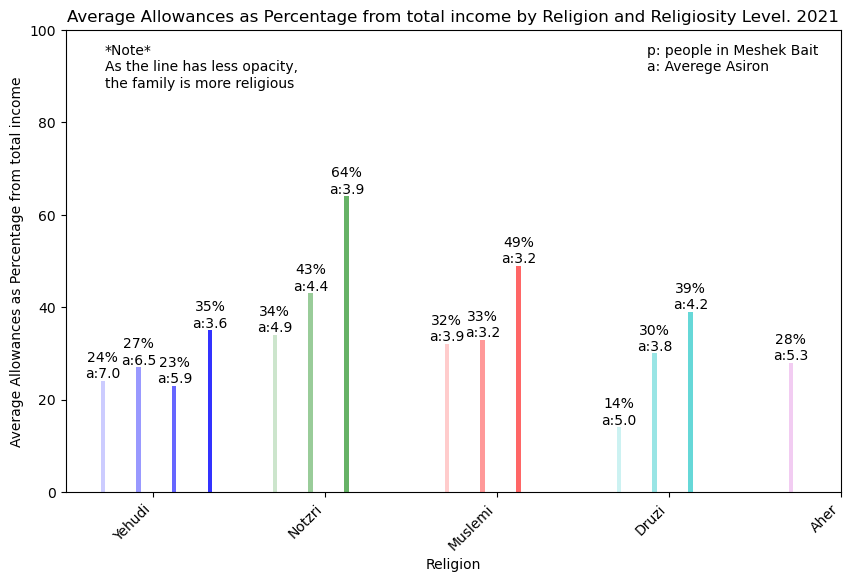

In [14]:

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for different religiosity levels
colors = ['b', 'g', 'r', 'c', 'm', 'y']

width = 0.1  # the width of the bars
multiplier = 0

religion_names = religions_means['religion_name'].unique()

# Iterate through each religion and plot bars for each religiosity level
for religion, color in zip(religions_means['religion_name'], colors):
    subset = f_grouped[f_grouped['religion_name'] == religion]
    offset = width * multiplier
    rects = ax.bar(offset + (subset['religiosity_level']/1.2), subset['allowances_as_percentage'].round(), width, color=color)
#     ax.bar_label(rects, padding=1)
    multiplier += 40
    # Define custom labels for each bar
    for i, rect in enumerate(rects):
        asi = round(subset.iloc[i]['asiron'], 1)
        label = f'{int(rect.get_height())}%\na:{asi}'
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        ax.text(x, y, label, ha='center', va='bottom')
        rect.set_alpha(i/5 + 0.2)
                
# Set the x-axis labels to be religion names
ax.set_xticks([i*4 + 2 for i in range(len(religion_names))])
ax.set_xticklabels(religion_names, rotation=45, ha="right")

# add limit
plt.ylim(top=100)

# Set labels and title
ax.set_xlabel('Religion')
ax.set_ylabel('Average Allowances as Percentage from total income')
ax.set_title('Average Allowances as Percentage from total income by Religion and Religiosity Level. 2021')

note1 = '*Note*\nAs the line has less opacity,\nthe family is more religious'
ax.text(0.05, 0.97, note1, transform=ax.transAxes, fontsize=10, verticalalignment='top', backgroundcolor='white')

note2 = 'p: people in Meshek Bait\na: Averege Asiron'
ax.text(0.75, 0.97, note2, transform=ax.transAxes, fontsize=10, verticalalignment='top', backgroundcolor='white')